# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages

import numpy as np
import pandas as pd

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# Import data

aqi = pd.read_csv("c4_epa_air_quality.csv", index_col=0)

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
# Code Here
aqi.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [4]:
# Code Here
aqi.describe()

,arithmetic_mean,aqi
count,260.000000,260.000000
mean,0.403169,6.757692
std,0.317902,7.061707
min,0.000000,0.000000
25%,0.200000,2.000000
50%,0.276315,5.000000
75%,0.516009,9.000000
max,1.921053,50.000000


In [9]:
# Code Here
aqi['aqi'].mean()

6.757692307692308

**Question:** What time range does this data cover?

In [10]:
# Code Here

aqi['date_local'].unique()

array(['2018-01-01'], dtype=object)

A: The only date present in this dataset is January 1st, 2018

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [11]:
# Code Here

min = aqi['aqi'].min()
max = aqi['aqi'].max()

min, max

(0, 50)

**Question:** Are all states equally represented in the dataset?

In [12]:
# Code Here

len(aqi['state_name'].unique())

52

In [13]:
# Code Here
aqi['state_name'].unique()

array(['Arizona', 'Ohio', 'Wyoming', 'Pennsylvania', 'Iowa', 'Hawaii',
       'Colorado', 'Minnesota', 'Indiana', 'Missouri', 'Connecticut',
       'California', 'Nevada', 'Virginia', 'Rhode Island', 'Texas',
       'Illinois', 'Kansas', 'Maryland', 'New Jersey', 'Massachusetts',
       'Maine', 'Idaho', 'Florida', 'Vermont', 'Tennessee', 'Georgia',
       'South Dakota', 'North Carolina', 'West Virginia', 'Michigan',
       'Nebraska', 'Alabama', 'Washington', 'Kentucky', 'Oklahoma',
       'New York', 'North Dakota', 'Montana', 'Utah', 'Delaware',
       'New Hampshire', 'Louisiana', 'Mississippi', 'New Mexico',
       'Oregon', 'District Of Columbia', 'Arkansas', 'Puerto Rico',
       'South Carolina', 'Alaska', 'Wisconsin'], dtype=object)

A: Yes, including both Puerto Rico and the District of Columbia

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [19]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(states)]
    

# Find the mean aqi for each of the RRE states.
 #alias as aqi_rre
mean_aqi_rre = aqi_rre.groupby('state_name')['aqi'].mean()

mean_aqi_rre

state_name
California      12.121212
Florida          5.500000
Michigan         8.111111
Ohio             3.333333
Pennsylvania     2.900000
Texas            2.700000
Name: aqi, dtype: float64

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [22]:
# Import seaborn as sns.

import seaborn as sns
import matplotlib.pyplot as plt

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

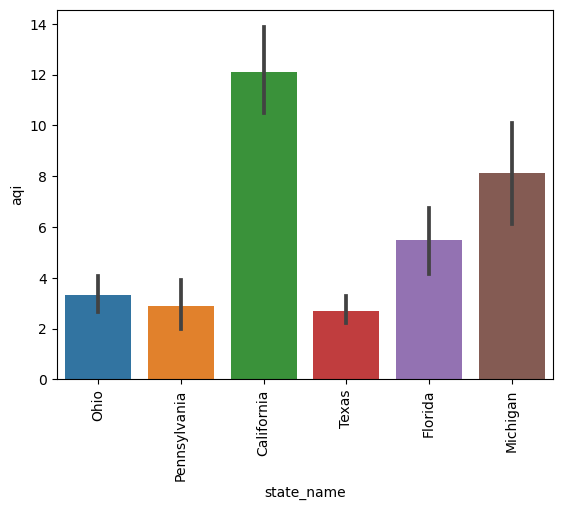

In [29]:
# Code Here

sns.barplot(data = aqi_rre, x = 'state_name', y = 'aqi')
plt.xticks(rotation=90)
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A: Based on the data and this visualization, I think out of the RRE states, California will be the most affected, followed by Michigan, Florida, Ohio, Pennsylvania, then finally Texas.

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [30]:
# Find the mean aqi for CA state.

ca_aqi = aqi[aqi['state_name'] == 'California']
mean_aqi_ca = ca_aqi['aqi'].mean()
mean_aqi_ca


12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [32]:
from scipy import stats

# Input your confidence level here:
estimated_standard_error = aqi_rre['aqi'].std() / np.sqrt(aqi_rre.shape[0])
stats.norm.interval(0.95, loc=mean_aqi_ca, scale=estimated_standard_error)

(10.882691860679538, 13.359732381744704)

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [33]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.
sample_size = len(aqi_rre)
std_dev = aqi_rre.std()
standard_error = std_dev / np.sqrt(sample_size)

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = z_value * standard_error
margin_of_error

/var/folders/3w/jh9p_57s2_j100_n1hg8vd4w0000gn/T/ipykernel_9053/3311018423.py:9: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_dev = aqi_rre.std()


arithmetic_mean    0.059166
aqi                1.238543
dtype: float64

### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [36]:
# Calculate your confidence interval (upper and lower limits).

mean = aqi_rre['aqi'].mean()
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

lower_bound, upper_bound


(arithmetic_mean    8.638313
 aqi                7.458936
 dtype: float64,
 arithmetic_mean    8.756645
 aqi                9.936022
 dtype: float64)

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [37]:
# Import stats from scipy.

from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [38]:
# Code Here

confidence_interval = stats.norm.interval(.95, loc=mean, scale=standard_error)
confidence_interval

(array([8.6383138 , 7.45895873]), array([8.75664418, 9.93599925]))

# Considerations

**What are some key takeaways that you learned from this project?**

A: I learned multiple ways to construct a confidence interval, as well as how to create a boxplot using seaborn and matplotlib elements.

**What findings would you share with others?**

A: I would share both the boxplot and confidence interval findings, including lower bounds and upper bounds for it. 

**What would you convey to external readers?**

A: Confidence intervals are important to share because they provide a clear and transparent way to communicate the degree of uncertainty surrounding a data point or research finding, allowing them to make informed decisions based on the range of plausible values rather than just a single estimate

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 